# HR Analytics


#### Dataset :
The dataset is based on the recruitment of sales employees for a company in Austrailia. 
The analysis and the model help us to analyse the factors on which these recruitments are based and helps us to build a model on basis of that.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Import Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Users/hp/Desktop/Learning/HR PRoject/Dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unique ID                1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Age                      1000 non-null   int64 
 3   Experience               1000 non-null   int64 
 4   Education                1000 non-null   object
 5   MaritalDesc              1000 non-null   object
 6   1st Language             1000 non-null   object
 7   State                    1000 non-null   object
 8   Previous Post            1000 non-null   object
 9   Salary                   1000 non-null   int64 
 10  Platform of Application  1000 non-null   object
 11  Employment Status        1000 non-null   object
 12  PerformanceScore         1000 non-null   object
 13  EmpSatisfaction          1000 non-null   int64 
 14  Action                   1000 non-null   

In [5]:

print("The dataset has",data.shape,"and has different columns like",data.columns)

The dataset has (1000, 15) and has different columns like Index(['Unique ID', 'Gender', 'Age', 'Experience', 'Education', 'MaritalDesc',
       '1st Language', 'State', 'Previous Post', 'Salary',
       'Platform of Application', 'Employment Status', 'PerformanceScore',
       'EmpSatisfaction', 'Action'],
      dtype='object')


In [6]:
data.head()

,Unique ID,Gender,Age,Experience,Education,MaritalDesc,1st Language,State,Previous Post,Salary,Platform of Application,Employment Status,PerformanceScore,EmpSatisfaction,Action
0,1,Male,37,17,Graduate,Single,English,VIC,Sales Associate,51120,Linkedin,Employed,Exceeds,5,1
1,2,Male,45,22,Masters,Married,English,VIC,Account Executive,73149,Linkedin,Employed,Fully Meets,3,1
2,3,Male,37,12,Masters,Married,English,VIC,Outside Sales,66391,Linkedin,Employed,Fully Meets,3,1
3,4,Male,40,16,High School,Married,English,VIC,Account Manager,81354,CareerOne,Employed,Fully Meets,5,0
4,5,Male,29,6,Phd,Divorced,Other,VIC,Sales Manager,123217,Indeed,Employed,Fully Meets,4,0


## EDA

In [7]:
%%HTML

<div class='tableauPlaceholder' id='viz1622884230038' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HRAnalyticsEDA&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HRAnalyticsEDA&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HR&#47;HRAnalyticsEDA&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1622884230038');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Data Preprocessing

The data contains many attributes that are attributes which need to be converted to integers before the further analysis.

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

data['Sex'] = lb.fit_transform(data['Gender'])
data['Educatio'] = lb.fit_transform(data['Education'])
data['Marital'] = lb.fit_transform(data['MaritalDesc'])
data['Language'] = lb.fit_transform(data['1st Language'])
data['Residence'] = lb.fit_transform(data['State'])
data['Post'] = lb.fit_transform(data['Previous Post'])
data['Platform'] = lb.fit_transform(data['Platform of Application'])
data['EmpStatus'] = lb.fit_transform(data['Employment Status'])
data['Performance'] = lb.fit_transform(data['PerformanceScore'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unique ID                1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Age                      1000 non-null   int64 
 3   Experience               1000 non-null   int64 
 4   Education                1000 non-null   object
 5   MaritalDesc              1000 non-null   object
 6   1st Language             1000 non-null   object
 7   State                    1000 non-null   object
 8   Previous Post            1000 non-null   object
 9   Salary                   1000 non-null   int64 
 10  Platform of Application  1000 non-null   object
 11  Employment Status        1000 non-null   object
 12  PerformanceScore         1000 non-null   object
 13  EmpSatisfaction          1000 non-null   int64 
 14  Action                   1000 non-null   

In [9]:
data.drop(['Unique ID','Gender','Education','MaritalDesc','1st Language','State','Previous Post','Platform of Application','Employment Status','PerformanceScore'],inplace=True,axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1000 non-null   int64
 1   Experience       1000 non-null   int64
 2   Salary           1000 non-null   int64
 3   EmpSatisfaction  1000 non-null   int64
 4   Action           1000 non-null   int64
 5   Sex              1000 non-null   int32
 6   Educatio         1000 non-null   int32
 7   Marital          1000 non-null   int32
 8   Language         1000 non-null   int32
 9   Residence        1000 non-null   int32
 10  Post             1000 non-null   int32
 11  Platform         1000 non-null   int32
 12  EmpStatus        1000 non-null   int32
 13  Performance      1000 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 74.3 KB


After cleaning of the dataset, The data has been split between train and test with the test data being 30% of the overall data.

### Model Building

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('Action',axis=1)
y = data['Action']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 100)

print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

print('Shape of X test set {}'.format(X_test.shape),'&',' Size of Y test set {}'.format(y_test.shape))

Shape of X training set (700, 13) &  Size of Y training set (700,)
Shape of X test set (300, 13) &  Size of Y test set (300,)


## Data Modelling

The important factor to analyse in building the model related to recruitment is recall. The recruiter should make sure that an eligible candidate is not left out from the prediction.
A wrong candidate will be filtered out in the further processes like interview,etc but missing out on a eligible candidate will cost the company a lot more.

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "entropy",max_depth = 17)

dtree.fit(X_train,y_train)

y_predtree = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_predtree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       248
           1       0.51      0.52      0.51        52

    accuracy                           0.83       300
   macro avg       0.70      0.71      0.71       300
weighted avg       0.83      0.83      0.83       300



In [12]:
print(confusion_matrix(y_test,y_predtree))

[[222  26]
 [ 25  27]]


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

ylr = LR.predict(X_test)

print(classification_report(y_test,ylr))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



In [14]:
print(confusion_matrix(y_test,ylr))

[[248   0]
 [ 52   0]]


### Support Vector Machines

In [15]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train) 

y_predsvm = clf.predict(X_test)

print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



In [16]:
print(confusion_matrix(y_test,y_predsvm))

[[248   0]
 [ 52   0]]


### K - Nearest Negihbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_neigh = neigh.predict(X_test)

print(classification_report(y_test,y_neigh))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       248
           1       0.35      0.15      0.21        52

    accuracy                           0.80       300
   macro avg       0.59      0.55      0.55       300
weighted avg       0.76      0.80      0.77       300



In [18]:
print(confusion_matrix(y_test,y_neigh))

[[233  15]
 [ 44   8]]


### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

[[248   0]
 [ 52   0]]


In [20]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



### Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier(n_estimators=20,learning_rate=0.10)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[246   2]
 [ 50   2]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       248
           1       0.50      0.04      0.07        52

    accuracy                           0.83       300
   macro avg       0.67      0.52      0.49       300
weighted avg       0.77      0.83      0.76       300



### Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=5)

x_train_new = pr.fit_transform(X_train)
x_test_new = pr.fit_transform(X_test)

dtree = DecisionTreeClassifier(criterion = "entropy")

dtree.fit(x_train_new,y_train)

y_predtree1 = dtree.predict(x_test_new)

print(classification_report(y_test,y_predtree1))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       248
           1       0.37      0.44      0.40        52

    accuracy                           0.77       300
   macro avg       0.62      0.64      0.63       300
weighted avg       0.79      0.77      0.78       300



In [24]:
pr = PolynomialFeatures(degree=5)
x_train_new = pr.fit_transform(X_train)
x_test_new = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=5)

In [25]:
print(confusion_matrix(y_test,y_predtree))

[[222  26]
 [ 25  27]]


In the above models, we see that the value of selecting the candidate is not being predicted properly.
This happens due to the difference in the distribution of values of in the dependent variable which leads to over fitting.
This can be made proper by using techniques like over sampling and under sampling.

## Random Over Sampling

In [26]:
count_reject, count_accept = data.Action.value_counts()

df_reject = data[data['Action'] == 0]
df_accept = data[data['Action'] == 1]

Count of the data is taken and the data has been classified in different dataframes

In [27]:
df_accept_over = df_accept.sample(count_reject,replace=True)

df_test_over = pd.concat([df_reject,df_accept_over],axis=0)

df_test_over['Action'].value_counts()

1    811
0    811
Name: Action, dtype: int64

The Data has been randomly over-sampled to have same count of both defaulters and non defaulters

In [28]:
X_o = df_test_over.drop('Action',axis=1)
y_o = df_test_over['Action']

X_train, X_test, y_train, y_test = train_test_split(X_o, y_o, test_size=0.30,random_state=101)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

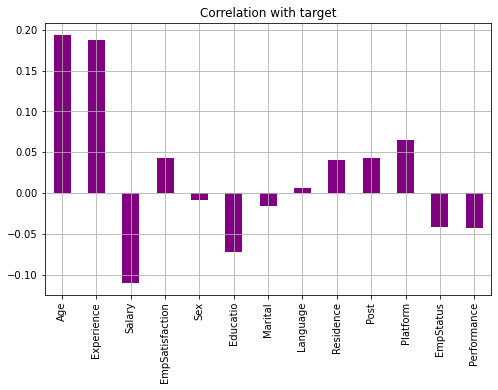

In [30]:
df_test_over.drop('Action', axis=1).corrwith(df_test_over.Action).plot(kind='bar',color='purple', grid=True, figsize=(8, 5), 
                                                   title="Correlation with target")

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
Ds = 20
dt_mean_acc = np.zeros((Ds-1))
dt_std_acc = np.zeros((Ds-1))
dt_f1 = np.zeros((Ds-1))
for n in range(1,Ds):
    
    #Train Model and Predict  
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loanTree.fit(X_train,y_train)
    
    yhat=loanTree.predict(X_test)
    dt_mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    dt_std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    dt_f1[n-1] = metrics.f1_score(y_test, yhat, average='weighted') 

#dt_mean_acc
dt_f1

array([0.5604973 , 0.5557824 , 0.73130032, 0.77815553, 0.7720867 ,
       0.81693171, 0.83512867, 0.85811528, 0.85107945, 0.87447881,
       0.89271934, 0.89695542, 0.90940505, 0.89904107, 0.90940505,
       0.913523  , 0.91148272, 0.91144457, 0.90316184])

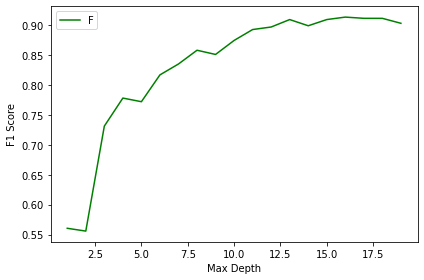

The best F1 was with 0.9135229975301032 with max_depth= 16


In [32]:
plt.plot(range(1,Ds),dt_f1,'g')
plt.legend(('F1 score'))
plt.ylabel('F1 Score')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()
print( "The best F1 was with", dt_f1.max(), "with max_depth=", dt_f1.argmax()+1) 

In [33]:
bestTree = DecisionTreeClassifier(criterion="entropy", max_depth = dt_f1.argmax()+1).fit(X_train,y_train)
bestTree
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, bestTree.predict(X_test)))
bestTree

Decision Tree's Accuracy: 0.9158110882956879


DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [34]:
dtree = DecisionTreeClassifier(criterion = "entropy",max_depth=18)

dtree.fit(X_train,y_train)

y_predtree = dtree.predict(X_test)

print(classification_report(y_test,y_predtree))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       246
           1       0.85      0.97      0.91       241

    accuracy                           0.90       487
   macro avg       0.91      0.90      0.90       487
weighted avg       0.91      0.90      0.90       487



In [35]:
print(confusion_matrix(y_test,y_predtree))

[[206  40]
 [  8 233]]


In [36]:
from sklearn import tree

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
Ds=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
lr_mean_acc = {}
lr_std_acc = {}
lr_f1 = {}
for n in Ds:
    LR = LogisticRegression(solver=n).fit(X_train,y_train)
    yhat=LR.predict(X_test)
    lr_mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    lr_std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    lr_f1[n] = metrics.f1_score(y_test, yhat, average='weighted') 

lr_f1

{'newton-cg': 0.6117721144222953,
 'lbfgs': 0.6117721144222953,
 'liblinear': 0.6117721144222953,
 'sag': 0.6117721144222953,
 'saga': 0.6117721144222953}

In [38]:
best_LR = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
print("LR's Accuracy:", metrics.accuracy_score(y_test, best_LR.predict(X_test)))

LR's Accuracy: 0.6119096509240246


In [39]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

ylr = LR.predict(X_test)

print(classification_report(y_test,ylr))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       246
           1       0.59      0.52      0.55       241

    accuracy                           0.58       487
   macro avg       0.58      0.58      0.58       487
weighted avg       0.58      0.58      0.58       487



In [40]:
print(confusion_matrix(y_test,ylr))

[[158  88]
 [115 126]]


In [41]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, ylr,pos_label=0)

0.4376731301939058

### SVM

In [42]:
from sklearn import svm
from sklearn.metrics import f1_score
Ds = ['linear', 'poly', 'rbf', 'sigmoid']
svm_mean_acc = {}
svm_std_acc = {}
svm_f1 = {}
for n in Ds:
    #Train Model and Predict  
    loansvm = svm.SVC(kernel=n).fit(X_train,y_train)
    
    yhat=loansvm.predict(X_test)
    svm_mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    svm_std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    svm_f1[n] = metrics.f1_score(y_test, yhat, average='weighted') 

svm_f1

{'linear': 0.6074653229511006,
 'poly': 0.7618009555880539,
 'rbf': 0.7901511041409264,
 'sigmoid': 0.4402978523871748}

In [43]:
best_svm = svm.SVC(kernel='rbf',probability=True).fit(X_train,y_train)
print("SVM's Accuracy:", metrics.accuracy_score(y_test, best_svm.predict(X_test)))

SVM's Accuracy: 0.7905544147843943


In [44]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train) 

y_predsvm = clf.predict(X_test)

print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       246
           1       0.76      0.84      0.80       241

    accuracy                           0.79       487
   macro avg       0.79      0.79      0.79       487
weighted avg       0.79      0.79      0.79       487



In [45]:
print(confusion_matrix(y_test,y_predsvm))

[[183  63]
 [ 39 202]]


In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predsvm, average='weighted') 

0.7901511041409264

### K - Nearest Negihbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88090349, 0.85010267, 0.79466119, 0.79055441, 0.74537988,
       0.74332649, 0.71663244, 0.70225873, 0.68172485])

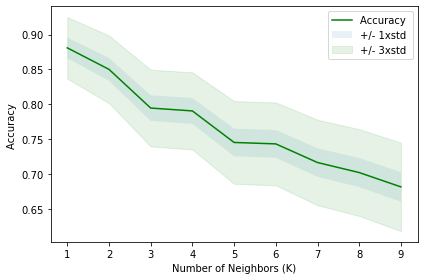

In [49]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [50]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8809034907597536 with k= 1


In [51]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_neigh = neigh.predict(X_test)

print(classification_report(y_test,y_neigh))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       246
           1       0.82      0.97      0.89       241

    accuracy                           0.88       487
   macro avg       0.89      0.88      0.88       487
weighted avg       0.89      0.88      0.88       487



In [52]:
print(confusion_matrix(y_test,y_neigh))

[[195  51]
 [  7 234]]


### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
model =  GradientBoostingClassifier(n_estimators=20,learning_rate=0.10)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[177  69]
 [ 37 204]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       246
           1       0.75      0.85      0.79       241

    accuracy                           0.78       487
   macro avg       0.79      0.78      0.78       487
weighted avg       0.79      0.78      0.78       487



### Random Forest Classifier

In [55]:
for i in range(149,351,50):
    print(f" trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f" accuracy:{clf.score(X_test, y_test)*100}%")
    print("")

 trying model with 149 estimators..
 accuracy:95.68788501026694%

 trying model with 199 estimators..
 accuracy:93.42915811088297%

 trying model with 249 estimators..
 accuracy:93.63449691991786%

 trying model with 299 estimators..
 accuracy:93.63449691991786%

 trying model with 349 estimators..
 accuracy:93.42915811088297%



In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=199)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       246
           1       0.91      1.00      0.95       241

    accuracy                           0.95       487
   macro avg       0.95      0.95      0.95       487
weighted avg       0.96      0.95      0.95       487



In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[222  24]
 [  0 241]]


In [58]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

Mean Absolute Error: 0.049281314168377825
Mean Squared Error: 0.049281314168377825
Root Mean Squared Error: 0.22199395074726208


### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=5)

x_train_new = pr.fit_transform(X_train)
x_test_new = pr.fit_transform(X_test)

dtree = DecisionTreeClassifier(criterion = "entropy")

dtree.fit(x_train_new,y_train)

y_predtree1 = dtree.predict(x_test_new)

print(classification_report(y_test,y_predtree1))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       246
           1       0.85      0.98      0.91       241

    accuracy                           0.90       487
   macro avg       0.91      0.90      0.90       487
weighted avg       0.91      0.90      0.90       487



In [60]:
pr = PolynomialFeatures(degree=5)
x_train_new = pr.fit_transform(X_train)
x_test_new = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=5)

In [61]:
print(confusion_matrix(y_test,y_predtree))

[[206  40]
 [  8 233]]


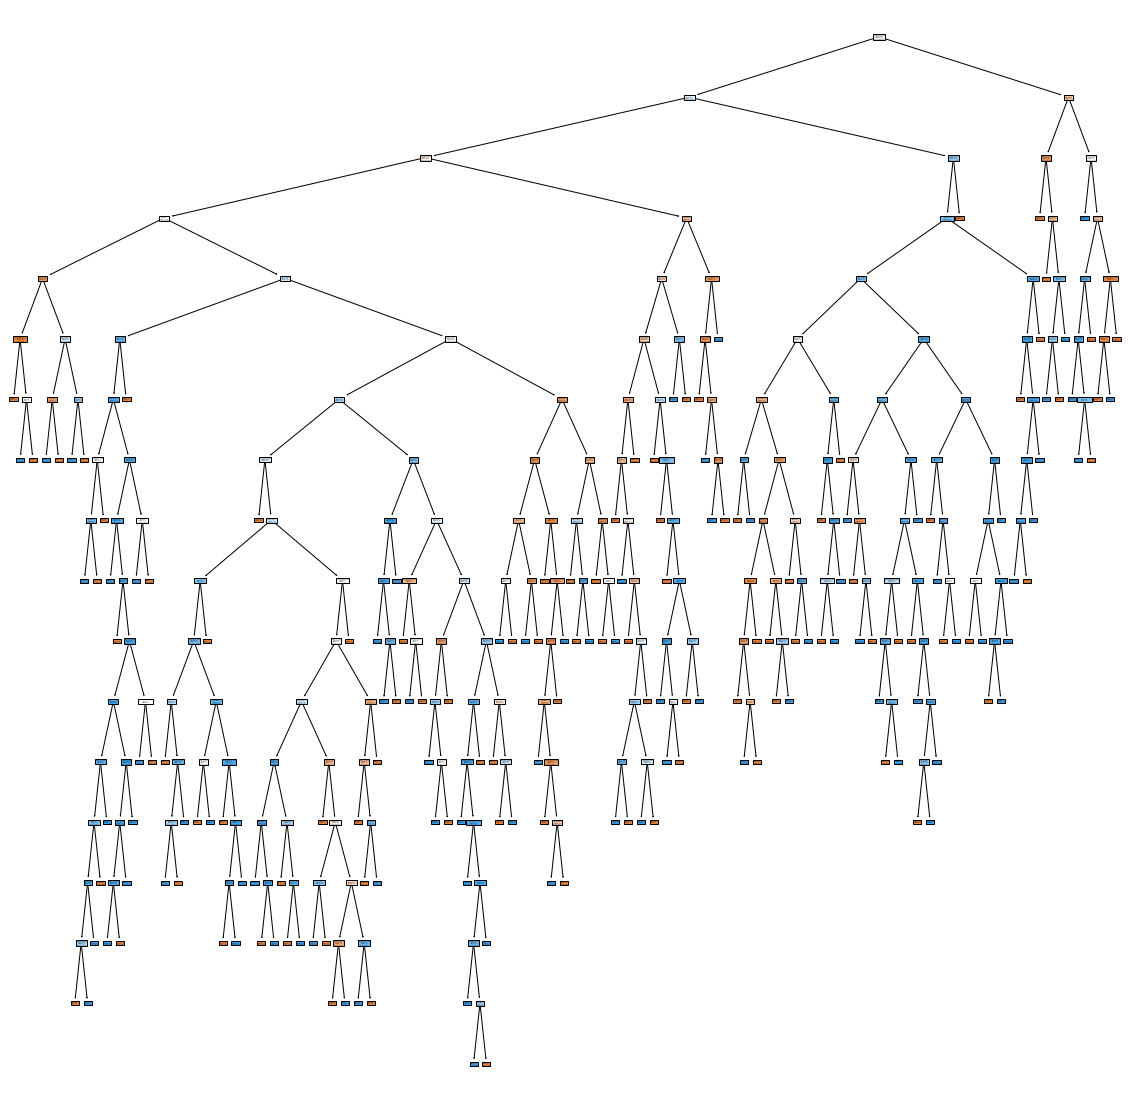

In [62]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X_o.columns, filled=True)

### Conclusion

We see that from the analysis, the random forest classifier is the best model for the prediction of the dataset.
Using the model, we can get the following feature importances.

In [63]:
fi = pd.DataFrame({'feature': list(X_o.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [64]:
fi

,feature,importance
1,Experience,0.168831
0,Age,0.168165
5,Educatio,0.147236
2,Salary,0.136529
9,Post,0.075908
10,Platform,0.063366
6,Marital,0.048627
3,EmpSatisfaction,0.043341
12,Performance,0.040499
8,Residence,0.038876
